In [ ]:
'''
【项目03】  知乎数据清洗整理和结论研究

作业要求：
1、数据清洗 - 去除空值
要求：创建函数
提示：fillna方法填充缺失数据，注意inplace参数

2、问题1 知友全国地域分布情况，分析出TOP20
要求：
① 按照地域统计 知友数量、知友密度（知友数量/城市常住人口），不要求创建函数
② 知友数量，知友密度，标准化处理，取值0-100，要求创建函数
③ 通过多系列柱状图，做图表可视化
提示：
① 标准化计算方法 = (X - Xmin) / (Xmax - Xmin)
② 可自行设置图表风格

3、问题2 知友全国地域分布情况，分析出TOP20
要求：
① 按照学校（教育经历字段） 统计粉丝数（‘关注者’）、关注人数（‘关注’），并筛选出粉丝数TOP20的学校，不要求创建函数
② 通过散点图 → 横坐标为关注人数，纵坐标为粉丝数，做图表可视化
③ 散点图中，标记出平均关注人数（x参考线），平均粉丝数（y参考线）
提示：
① 可自行设置图表风格

'''

                        _id  关注的收藏夹   关注  关注者  关注的问题  关注的话题  关注的专栏   职业1  \
0  587598f89f11daf90617fb7a      52   17    1     30     58      2  交通仓储   
1  587598f89f11daf90617fb7c      27   73   15     87     26      1  高新科技   
2  587598f89f11daf90617fb7e      72   94    1    112     20      4   NaN   
3  587598f89f11daf90617fb80     174   84    8    895     30      7    金融   
4  587598f89f11daf90617fb82       3  236   64    119     44     17    金融   

    职业2    回答   提问    收藏       个人简介  居住地  所在行业                       教育经历 职业经历  
0    邮政   0.0  0.0   3.0        NaN  NaN    邮政                        NaN  NaN  
1   互联网  56.0  4.0  14.0        NaN   重庆   互联网                     重庆邮电大学  NaN  
2   NaN   1.0  0.0  21.0        NaN  NaN   NaN                        NaN  NaN  
3    财务   0.0  0.0  22.0        NaN  NaN    财务                        NaN  NaN  
4  证券投资   6.0  0.0  12.0  无求 心静 魔不生   上海  证券投资  雪城大学（Syracuse University）  NaN  
     省   地区 结尾        常住人口
0  安徽省  安徽省  省  59500468.0
1  

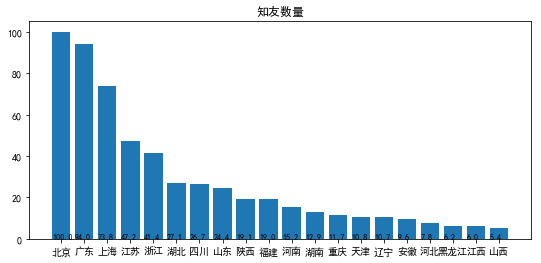

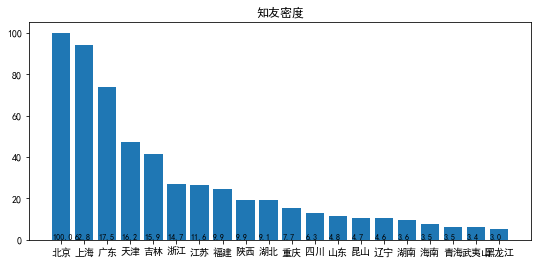

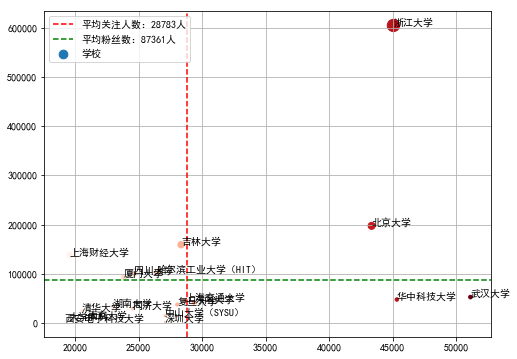

In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import os
#数据载入
path = os.getcwd()
os.chdir(path)
zhihu = pd.read_csv('知乎数据_201701.csv', engine = 'python')
changzhu = pd.read_csv('六普常住人口数.csv', engine = 'python')
print(zhihu.head())
print(changzhu.head())
 
#数据清洗
def data_cleaning(df):
    for column in df.columns:
        if df[column].dtype ==  'object':
            df[column].fillna('缺失数据', inplace = True)
        else:
            df[column].fillna(0, inplace = True)
    return(df)
 
zhihu_clean = data_cleaning(zhihu)
zhihu_clean.head(10)
 
#绘图
 
def data_nor(df, *cols):
    colnames = []
    for col in cols:
        colname = col + '_nor'
        df[colname] = (df[col]-df[col].min())/(df[col].max()-df[col].min()) * 100
        colnames.append(colname)
    return(df,colnames)
 
liveIn = zhihu_clean.groupby('居住地').count()  
changzhu['city'] = changzhu['地区'].str[:-1]   
 
temp1 = pd.merge(liveIn, changzhu, left_index = True, right_on = 'city', how = 'inner')[['_id','city','常住人口']]
temp1['知友密度'] = temp1['_id']/temp1['常住人口'] 
 
resultdata = data_nor(temp1,'_id','知友密度')[0]
resultcolnames = data_nor(temp1,'_id','知友密度')[1]
temp1_top20_sl = resultdata.sort_values(resultcolnames[0], ascending=False)[['city',resultcolnames[0]]].iloc[:20]
temp1_top20_md = resultdata.sort_values(resultcolnames[1], ascending=False)[['city',resultcolnames[1]]].iloc[:20]
 
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
figNum = plt.figure(num=1,figsize=(9,4))
y1 = temp1_top20_sl[resultcolnames[0]]
plt.bar(range(20),
        y1,
        tick_label = temp1_top20_sl['city'])
plt.title('知友数量')
for i,j in zip(range(20),y1):
    plt.text(i-0.4,0,'%.1f' % j, color = 'k',fontsize = 8)
     
figMd = plt.figure(num=2,figsize=(9,4))
y2 = temp1_top20_md[resultcolnames[1]]
plt.bar(range(20),
        y1,
        tick_label = temp1_top20_md['city'])
plt.title('知友密度')
for i,j in zip(range(20),y2):
    plt.text(i-0.4,0,'%.1f' % j, color = 'k',fontsize = 8)
 
#绘图2    
temp2 = zhihu_clean.groupby('教育经历').sum()[['关注','关注者']].drop(['缺失数据','大学','本科'])
temp2_clean = temp2.sort_values('关注',ascending=False)[:20]
 
plt.figure(figsize=(8,6))
x = temp2_clean['关注']
y = temp2_clean['关注者']
follow_mean = temp2_clean['关注'].mean()
fans_mean = temp2_clean['关注者'].mean()
plt.scatter(x,y,marker='.',
           s = y/1000,
           cmap = 'Reds',
           c = x,
           label = '学校')
 
plt.axvline(follow_mean,label="平均关注人数：%i人" % follow_mean,color='r',linestyle="--")
plt.axhline(fans_mean,label="平均粉丝数：%i人" % fans_mean,color='g',linestyle="--")
plt.legend(loc = 'upper left')
plt.grid()
 
for i,j,n in zip(x,y,temp2_clean.index):
    plt.text(i,j,n, color = 'k')